# Business Problem: 
***Get insights from the dataset of INX Future Inc., to find-out why the employees' Performance Index is not as per expectations and what can be done to improve the current situation.***

# Objective: 
- In this notebook we use our Trained  XGBClassifier  Machine Learning Model and other like Random Forest Classifier and DecisionTreeClassifier  Machine Learning Models to visualize the Decision Trees, that ultimatly predict PerformanceRating.
- Here we use 'INX_Future_Inc_Employee_Performance_Processed_Data.xlsx

**Steps in Predict_model**

Step 1 : Import the libraries

Step 2 : Import the Processed data-set

Step 3 : Split the Processed data-set 

Step 4 : Visualize Gradient Boosting Decision Trees With XGBoost

Step 4 : Visualize the resulting leafs and nodesusing graphviz (Random Forest and Decision Tree)

In [1]:

# Import the libraries
import pandas as pd #andas is for data manipulation and analysis. 

# Import Different Models 
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz

import re
# plot decision tree
#!pip install graphviz
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
#pd.set_option('display.height', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_excel('INX_Future_Inc_Employee_Performance_Processed010_Data.xlsx',index=False)
df.head(1)

,EmpNumber,SalaryHike_NewCat,Env_Satis_NewCat,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,EmpJobRole,EmpHourlyRate,EmpDepartment_Development,Age,PerformanceRating
0,E1001000,1,2,4,12,0,2,7,13,55,0,32,3


In [3]:
# Save EmpNumber for later
Emp_Number = df.EmpNumber

In [4]:
df.drop("EmpNumber",axis=1, inplace = True)

In [5]:
# Create train and test splits
target_name = 'PerformanceRating'
X = df.drop('PerformanceRating', axis=1)


y=df[target_name]

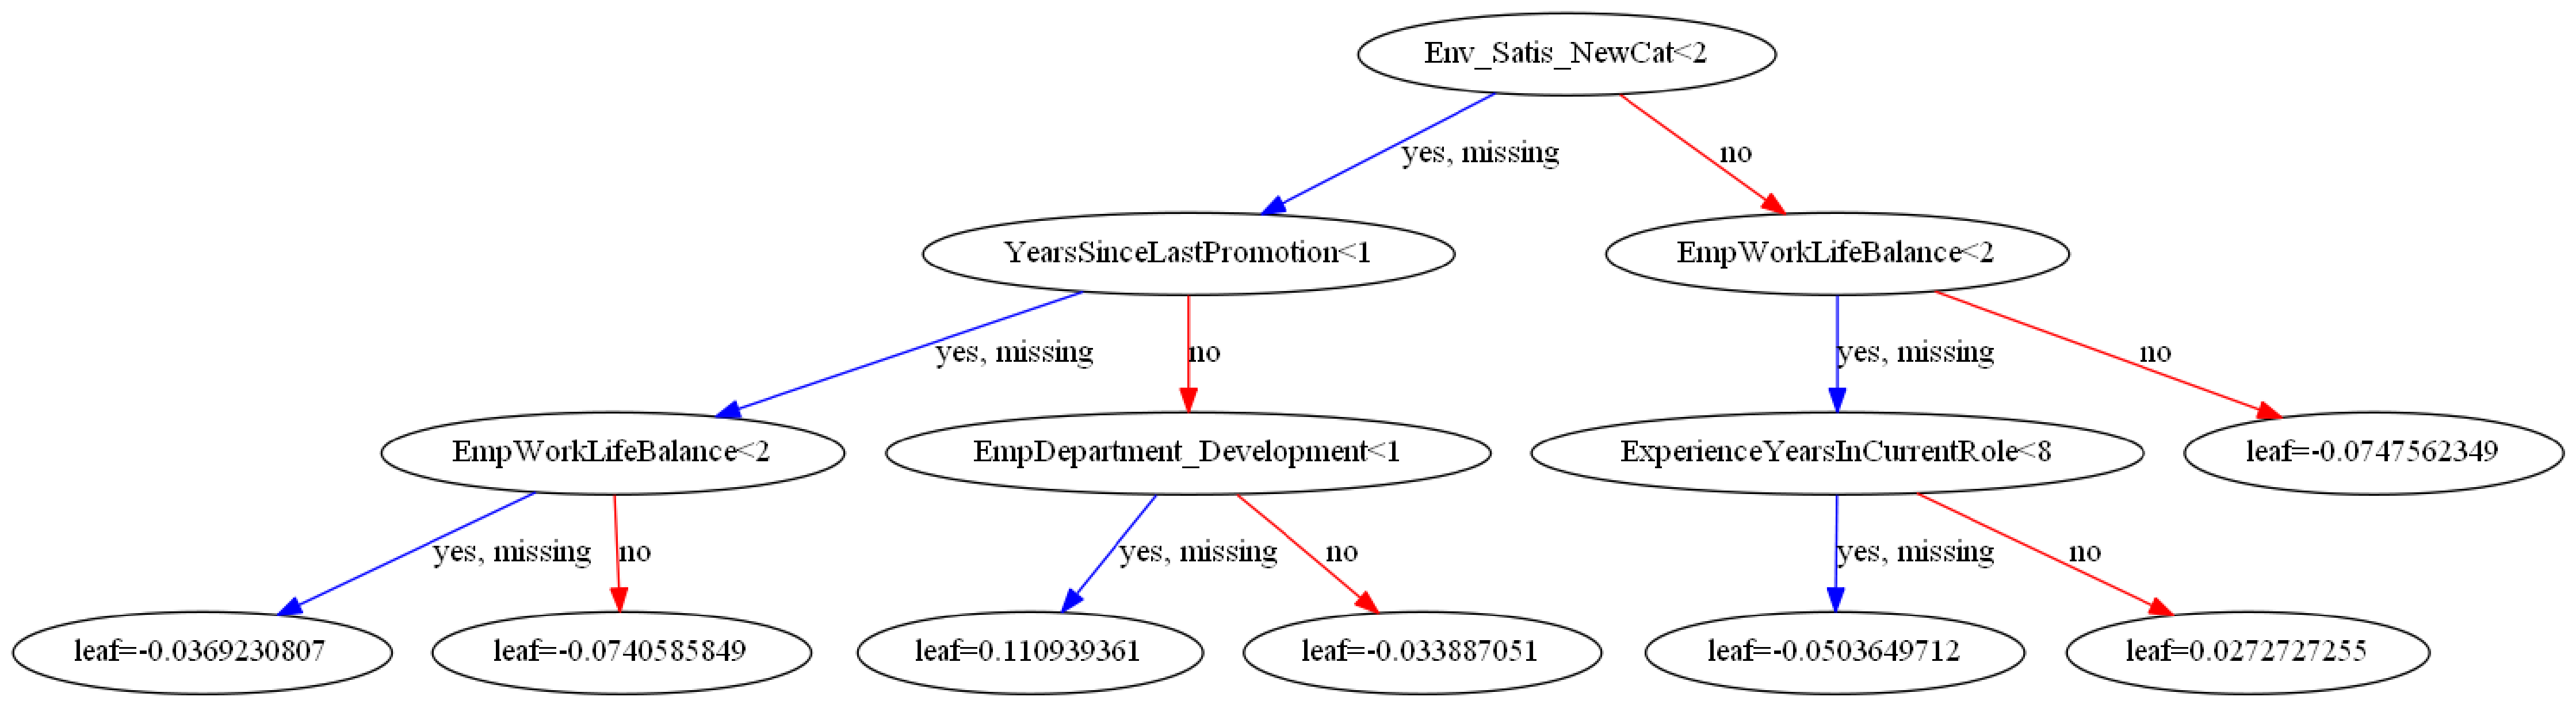

In [6]:

import graphviz

# load data
df = pd.read_excel('INX_Future_Inc_Employee_Performance_Processed010_Data.xlsx',index=False)
# Save EmpNumber for later
Emp_Number = df.EmpNumber
df.drop("EmpNumber",axis=1, inplace = True)
# split data into X and y
# Create train and test splits
target_name = 'PerformanceRating'
X = df.drop('PerformanceRating', axis=1)


y=df[target_name]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot single tree

rcParams['figure.figsize'] = 80,50

plot_tree(model, num_trees=0)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0, stratify=None)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 11)
(240, 11)
(960,)
(240,)


In [8]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

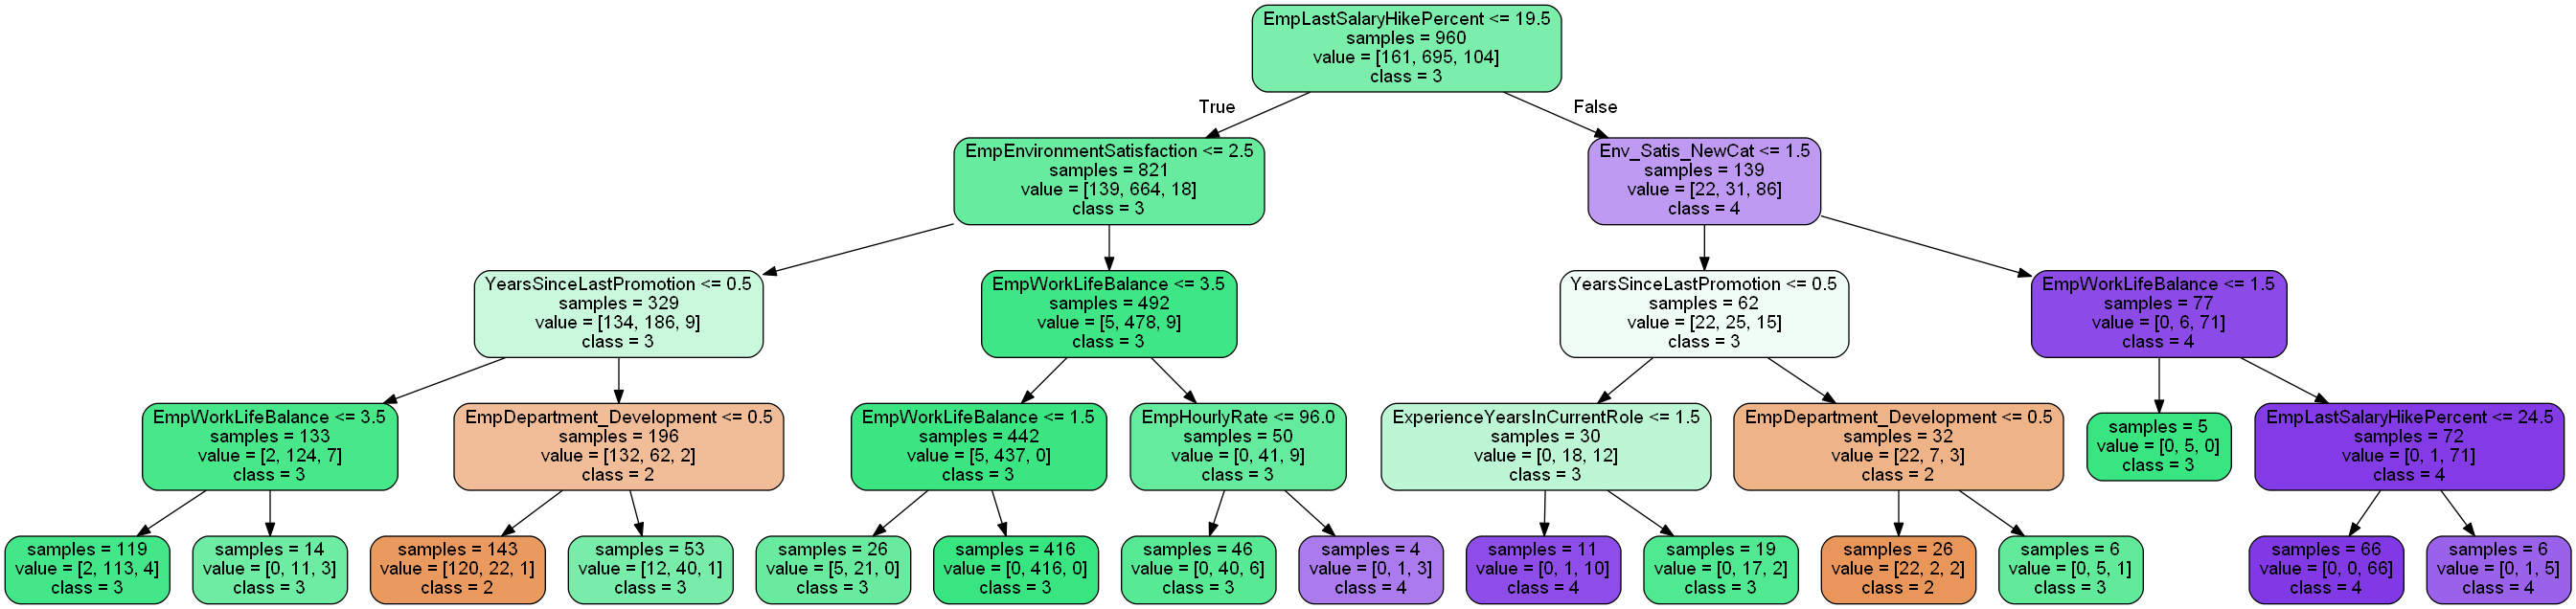

In [9]:

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

y_pred = model.predict(X_test)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = X_train.columns.values,
                              class_names = ['2','3','4'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

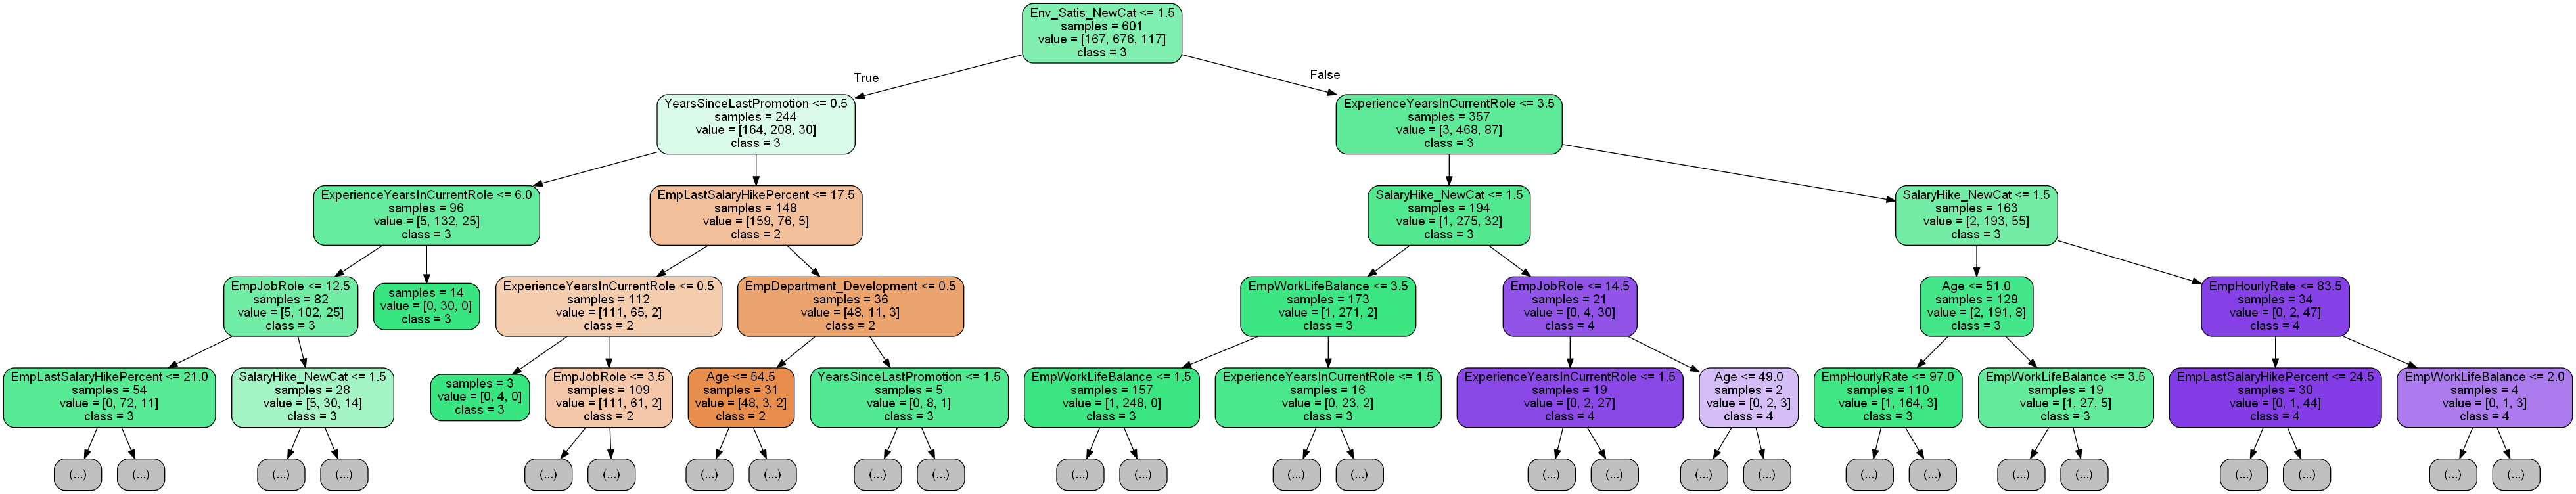

In [10]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import export_graphviz

import re
model = RandomForestClassifier(n_estimators=5)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[4]

#decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
#decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
#y_pred = decision_tree.predict(X_test)

y_pred = model.predict(X_test)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(estimator,
                             #decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = X_train.columns.values,
                              class_names = ['2','3','4'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree12.png'])

# Annotating chart with PIL
img = Image.open("tree12.png")
draw = ImageDraw.Draw(img)
img.save('sample-out2.png')
PImage("sample-out2.png", height=2000, width=1900)